In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df_base = pd.read_excel('record_base_ML.xlsx')
df_real = pd.read_excel('ins_2018_2020_part2_QuantileRules.xlsx')

In [3]:
#df_base[['MRN','Category','CreatedDate','WaitTime','CTUnit',
     #    'LinacUnit','TxDuration','TxFracs']].to_excel('record_base.xlsx')

In [4]:
'''df_temp = df_real[(df_real['CreatedDate']>='2020-01-01')&(df_real['CreatedDate']<'2020-03-01')][['MRN','CreatedDate','TxFracs']]
df_base = df_base[(df_base['CreatedDate']>='2020-01-01')&(df_base['CreatedDate']<'2020-03-01')]
df_base = df_base.merge(df_temp, on=['MRN','CreatedDate'])'''

"df_temp = df_real[(df_real['CreatedDate']>='2020-01-01')&(df_real['CreatedDate']<'2020-03-01')][['MRN','CreatedDate','TxFracs']]\ndf_base = df_base[(df_base['CreatedDate']>='2020-01-01')&(df_base['CreatedDate']<'2020-03-01')]\ndf_base = df_base.merge(df_temp, on=['MRN','CreatedDate'])"

## Real case

In [61]:
df_real = df_real[(df_real['Category_x']!='Emergency 1')&(df_real['Category_x']!='Planned Delay 3')]
df_real_1 = df_real[(df_real['CreatedDate']>=pd.to_datetime('2019-12-01'))&
                  (df_real['CreatedDate']<pd.to_datetime('2020-03-01'))]
df_real_1 = df_real_1.sort_values(by=['CreatedDate'])

In [62]:
df_real_1.shape

(1042, 32)

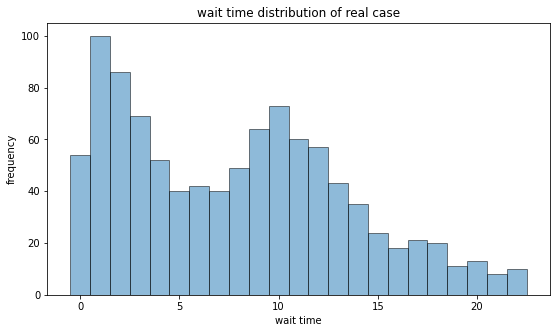

In [63]:
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_real_1['WaitTime(weekday)']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of real case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [322]:
df_real_1['WaitTime(weekday)'].mean()


9.031669865642995

In [323]:
df_real_1['WaitTime(weekday)'].std()

8.142460837270738

In [324]:
df_real_1['WaitTime(weekday)'].quantile([.1, .5, .75])

0.10     1.0
0.50     8.0
0.75    12.0
Name: WaitTime(weekday), dtype: float64

In [336]:
df_real_1[df_real_1['WaitTime']>14].shape

(372, 32)

In [326]:
df_real_1[df_real_1['Category_x']=='Urgent 2']['WaitTime'].mean()

3.5634328358208953

In [327]:
df_real_1[(df_real_1['Category_x']=='Urgent 2')&(df_real['Intent1']=='Palliative')]['WaitTime'].mean()

<ipython-input-327-ae57d5718e78>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_real_1[(df_real_1['Category_x']=='Urgent 2')&(df_real['Intent1']=='Palliative')]['WaitTime'].mean()


2.5305164319248825

In [328]:
df_real_1[df_real_1['Intent1']=='Palliative']['WaitTime'].mean()

3.9083094555873927

In [11]:
#linac utilisations?
'''df_real_linac = df_real.groupby(['CreatedDate','TxUnit'])['TxApptDuration'].agg('sum').reset_index()
df_real_linac['year'] = df_real_linac['CreatedDate'].dt.year
df_real_linac['month'] = df_real_linac['CreatedDate'].dt.month
df_real_linac['date']=df_real_linac['year'].astype(str) + df_real_linac['month'].astype(str).str.zfill(2)
df_real_linac['Date'] = pd.to_datetime(df_real_linac['date'], format='%Y%m')

util_real = df_real_linac.groupby(['Date','TxUnit'])['TxApptDuration'].agg('sum').reset_index()'''

"df_real_linac = df_real.groupby(['CreatedDate','TxUnit'])['TxApptDuration'].agg('sum').reset_index()\ndf_real_linac['year'] = df_real_linac['CreatedDate'].dt.year\ndf_real_linac['month'] = df_real_linac['CreatedDate'].dt.month\ndf_real_linac['date']=df_real_linac['year'].astype(str) + df_real_linac['month'].astype(str).str.zfill(2)\ndf_real_linac['Date'] = pd.to_datetime(df_real_linac['date'], format='%Y%m')\n\nutil_real = df_real_linac.groupby(['Date','TxUnit'])['TxApptDuration'].agg('sum').reset_index()"

In [201]:
util_real = pd.read_excel('RealCase_LinacUtilization.xlsx')
util_real=util_real[['Date','TxUnit','monthlyTotalHours','AvgUtil']]
util_real['real_util'] = util_real['monthlyTotalHours']/(20*10)
util_real.sort_values(by=['Date','TxUnit'])


,Date,TxUnit,monthlyTotalHours,AvgUtil,real_util
0,2020-01-01,EA05,208.416667,1.096930,1.002003
2,2020-01-01,EA07,129.833333,0.683333,0.624199
4,2020-01-01,EA08,128.166667,0.674561,0.616186
6,2020-01-01,EV06,241.666667,1.271930,1.161859
8,2020-01-01,NA09,141.500000,0.744737,0.680288
10,2020-01-01,NA10,194.750000,1.025000,0.936298
12,2020-01-01,NA11,171.083333,0.900439,0.822516
14,2020-01-01,NA12,254.166667,1.337719,1.221955
16,2020-01-01,SA04,125.750000,0.661842,0.604567
18,2020-01-01,SV01,72.916667,0.383772,0.350561


In [199]:
util_recent = util_real[(util_real['Date']>='2020-01-01')&(util_real['Date']<'2020-03-01')]
util_recent.groupby(['TxUnit'])['AvgUtil'].agg('mean')
# from data

TxUnit
EA05    0.976535
EA07    0.649781
EA08    0.741009
EV06    1.064035
NA09    0.622149
NA10    0.933114
NA11    0.924561
NA12    1.364912
SA04    0.583991
SV01    0.354167
SV02    0.321491
SV03    0.615351
WA15    0.928509
WA17    1.116886
WU14    0.015789
WV16    0.616009
Name: AvgUtil, dtype: float64

## Real data - pandemic

In [329]:
df_real_2 = df_real[(df_real['CreatedDate']>=pd.to_datetime('2020-03-01'))&
                  (df_real['CreatedDate']<pd.to_datetime('2020-06-01'))]
df_real_2 = df_real_2.sort_values(by=['CreatedDate'])

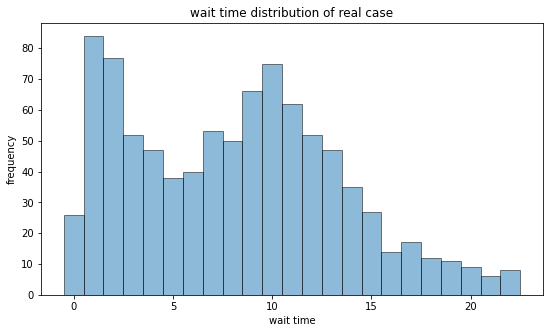

In [330]:
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_real_2['WaitTime(weekday)']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of real case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [338]:
df_real_2.shape

(947, 32)

In [339]:
print('mean: ', df_real_2['WaitTime(weekday)'].mean())
print('std: ', df_real_2['WaitTime(weekday)'].std())
print('wait time quantiles:\n', df_real_2['WaitTime(weekday)'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_real_2[df_real_2['WaitTime(weekday)']>10]))
print('urgent: ', df_real_2[df_real_2['Category_x']=='Urgent 2']['WaitTime(weekday)'].mean())
print('urgent & palliative: ', df_real_2[(df_real_2['Category_x']=='Urgent 2')&
                                           (df_real_2['Intent1']=='Palliative')]['WaitTime(weekday)'].mean())

mean:  9.182682154171067
std:  8.611745015180034
wait time quantiles:
 0.10     1.0
0.50     9.0
0.75    12.0
Name: WaitTime(weekday), dtype: float64
number of exceed:  337
urgent:  2.6018099547511313
urgent & palliative:  2.299492385786802


## Base case

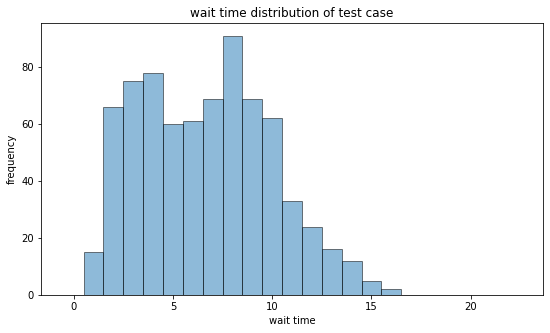

In [95]:
#df_base = pd.read_excel('record_base.xlsx')
#df_base = pd.read_excel('record_relaxU1.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_base['WaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of test case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [15]:
df_base['WaitTime'].mean()

6.696476964769648

In [16]:
df_base['WaitTime'].std()

3.301249884617918

In [17]:
df_base['WaitTime'].quantile([.1, .5, .75])

0.10    2.0
0.50    7.0
0.75    9.0
Name: WaitTime, dtype: float64

In [18]:
df_base[df_base['WaitTime']>=10].shape

(154, 9)

In [99]:
df_base.head()


,Unnamed: 0,MRN,Category,CreatedDate,WaitTime,CTUnit,LinacUnit,TxDuration,numFracs,totalHours
0,0,907979,Urgent 2,2020-01-01,4.0,3,14,30,1,0.500000
1,0,376136,Standard 3,2020-01-02,9.0,3,6,70,16,16.166667
2,1,805061,Standard 3,2020-01-02,6.0,4,15,30,5,1.833333
3,2,1165551,Standard 3,2020-01-02,11.0,"3, 4",1,30,17,5.833333
4,3,2098444,Standard 3,2020-01-02,11.0,3,14,45,25,14.750000


In [97]:
df_base['totalHours'] = (df_base['TxDuration']+(df_base['numFracs']-1)*(df_base['TxDuration']-10))/60

In [98]:
df_base_linac = df_base.groupby(['CreatedDate','LinacUnit'])['totalHours'].agg('sum').reset_index()
df_base_linac['year'] = df_base_linac['CreatedDate'].dt.year
df_base_linac['month'] = df_base_linac['CreatedDate'].dt.month
df_base_linac['date']=df_base_linac['year'].astype(str) + df_base_linac['month'].astype(str).str.zfill(2)
df_base_linac['Date'] = pd.to_datetime(df_base_linac['date'], format='%Y%m')

util_base = df_base_linac.groupby(['Date','LinacUnit'])['totalHours'].agg('sum').reset_index()
util_base['AvgUtil'] = util_base['totalHours']/(20*8.8)
util_base.sort_values(by=['LinacUnit'])

,Date,LinacUnit,totalHours,AvgUtil
0,2020-01-01,1,52.500000,0.298295
16,2020-02-01,1,98.583333,0.560133
17,2020-02-01,2,59.416667,0.337595
1,2020-01-01,2,76.416667,0.434186
18,2020-02-01,3,66.833333,0.379735
2,2020-01-01,3,64.083333,0.364110
19,2020-02-01,4,80.750000,0.458807
3,2020-01-01,4,182.166667,1.035038
20,2020-02-01,5,22.000000,0.125000
4,2020-01-01,5,119.500000,0.678977


In [57]:
util_base.groupby(['LinacUnit'])['AvgUtil'].agg('mean')
# monthly average utilisation per unit

LinacUnit
1     0.336648
2     0.290246
3     0.285038
4     0.576941
5     0.325994
6     0.397491
7     0.429766
8     0.629972
9     0.267756
10    0.516335
11    0.766098
12    0.480587
14    0.917377
15    0.586648
16    0.620739
17    0.750473
Name: AvgUtil, dtype: float64

In [145]:
'''util_real["LinacUnit"] = util_real['TxUnit'].replace({"SV01": 1, 
                                "SV02": 2,
                                "SV03":3,
                                "SA04":4,
                                "EA05":5,
                                "EV06":6,
                                "EA07":7,
                                "EA08":8,
                                "NA09":9,
                                "NA10":10,
                                "NA11":11,
                                "NA12":12,
                                "WU14":14,
                                "WA15":15,
                                "WV16":16,
                                "WA17":17 })'''

In [151]:
'''df_unit14 = pd.DataFrame([[pd.to_datetime("2020-01-01"), "WU14", 0, 14]], 
                         columns=['Date',"TxUnit","TxApptDuration","LinacUnit"])
util_real = util_real.append(df_unit14)
util_real.sort_values(by=['Date','LinacUnit'], inplace=True)
util_real'''

,Date,TxUnit,TxApptDuration,LinacUnit
9,2020-01-01,SV01,190,1
10,2020-01-01,SV02,205,2
11,2020-01-01,SV03,595,3
8,2020-01-01,SA04,630,4
0,2020-01-01,EA05,985,5
3,2020-01-01,EV06,1400,6
1,2020-01-01,EA07,535,7
2,2020-01-01,EA08,880,8
4,2020-01-01,NA09,1075,9
5,2020-01-01,NA10,1320,10


In [152]:
'''util_compare = util_real.merge(util_base, on=['Date','LinacUnit'])
util_compare = util_compare[['Date','TxUnit','TxApptDuration','TxDuration']]
util_compare.groupby(['Date'])'''

### Base case _ 1

In [85]:
df_high = pd.read_excel('record_base_new_rules_since201912_90p.xlsx') # actually 80p
df_high.head()

,Unnamed: 0,MRN,Category,Intent,CreatedDate,ModelWaitTime,CTUnit,LinacUnit,TxDuration,numFracs
0,0,160063,Urgent 2,Palliative,2019-12-02,5.0,4,15,30,5
1,1,1303927,Standard 3,Radical,2019-12-02,7.0,3,6,45,25
2,2,4654854,Standard 3,Radical,2019-12-02,8.0,3,6,30,25
3,3,907979,Urgent 2,Palliative,2019-12-02,5.0,3,8,70,5
4,4,4653015,Standard 3,Radical,2019-12-02,10.0,2,16,30,28


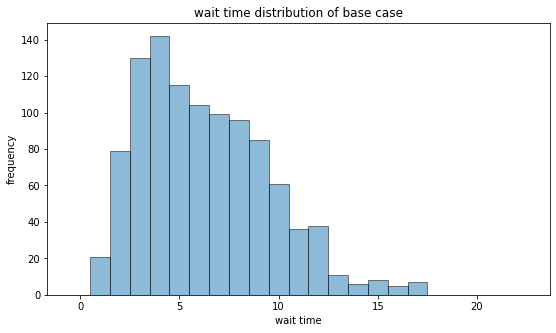

In [86]:
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_high['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [87]:
df_high['ModelWaitTime'].mean()

6.302972195589645

In [88]:
df_high['ModelWaitTime'].std()

3.2470658224126434

In [89]:
df_high['ModelWaitTime'].quantile([.1, .5, .75])

0.10    3.0
0.50    6.0
0.75    8.0
Name: ModelWaitTime, dtype: float64

In [90]:
df_high[df_high['ModelWaitTime']>=10].shape

(172, 10)

In [91]:
df_high['totalHours'] = (df_high['TxDuration'] + (df_high['numFracs']-1)*(df_high['TxDuration']-10))/60
df_high_linac = df_high.groupby(['CreatedDate','LinacUnit'])['totalHours'].agg('sum').reset_index()
df_high_linac['year'] = df_high_linac['CreatedDate'].dt.year
df_high_linac['month'] = df_high_linac['CreatedDate'].dt.month
df_high_linac['date']=df_high_linac['year'].astype(str) + df_high_linac['month'].astype(str).str.zfill(2)
df_high_linac['Date'] = pd.to_datetime(df_high_linac['date'], format='%Y%m')

util_80 = df_high_linac.groupby(['Date','LinacUnit'])['totalHours'].agg('sum').reset_index()
util_80['AvgUtil'] = (util_80['totalHours'])/(20*9)
util_80.sort_values(by=['LinacUnit'])
util_80.groupby(['LinacUnit'])['AvgUtil'].agg('mean')
### for std 3 and urgent 2 patients

LinacUnit
1     0.564198
2     0.310185
3     0.447377
4     0.643981
5     0.699691
6     0.814198
7     0.487963
8     0.751080
9     0.379938
10    0.517901
11    0.849228
12    0.876235
15    0.583951
16    0.790895
17    0.854475
Name: AvgUtil, dtype: float64

In [92]:
util_80['AvgUtil'] = (util_80['totalHours']+1)/(20*10)
util_80.sort_values(by=['LinacUnit'])
util_80.groupby(['LinacUnit'])['AvgUtil'].agg('mean')

LinacUnit
1     0.512778
2     0.284167
3     0.407639
4     0.584583
5     0.634722
6     0.737778
7     0.444167
8     0.680972
9     0.346944
10    0.471111
11    0.769306
12    0.793611
15    0.530556
16    0.716806
17    0.774028
Name: AvgUtil, dtype: float64

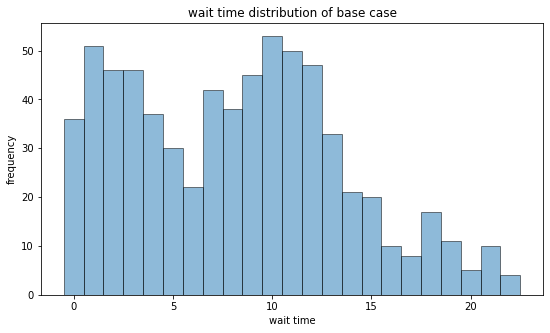

In [110]:

plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_real_h['WaitTime(weekday)']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [53]:
df_preallo2['WaitTime'].mean()

6.696476964769648

In [54]:
df_preallo2['WaitTime'].quantile([.1, .5, .75])

0.10    2.0
0.50    7.0
0.75    9.0
Name: WaitTime, dtype: float64

In [55]:
df_preallo2[df_preallo2['WaitTime']>=10].shape

(154, 9)

## 2019-12 to 2020-02 80th percentile

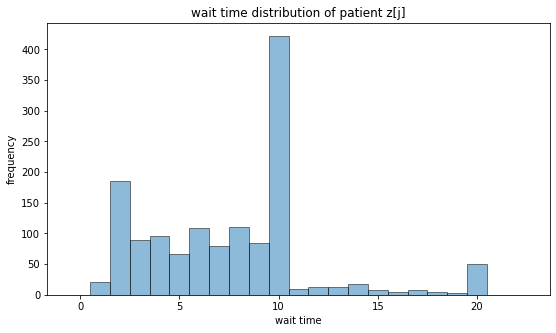

mean:  7.580043072505384
std:  4.203799355479744
wait time quantiles:
 0.10     2.0
0.50     8.0
0.75    10.0
Name: ModelWaitTime, dtype: float64
number of exceed:  129
urgent:  5.141666666666667
urgent & palliative:  4.548951048951049
objective value: 193
total computational time: 300.99 s


In [82]:
# minimise sum of z[j]
df_preallo2 = pd.read_excel('record_201912_202003_80p_weightedObj.xlsx')
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of patient z[j]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value: 193')
print('total computational time: 300.99 s')

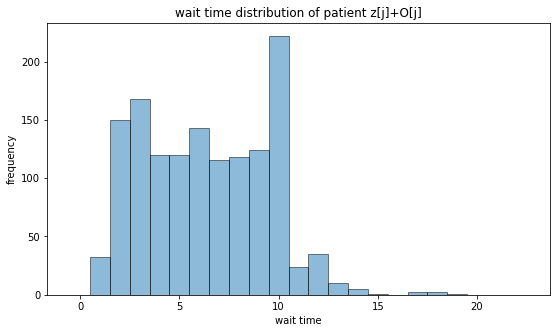

mean:  6.357501794687725
std:  3.153856891920834
wait time quantiles:
 0.10    2.0
0.50    6.0
0.75    9.0
Name: ModelWaitTime, dtype: float64
number of exceed:  80
urgent:  3.0555555555555554
urgent & palliative:  2.6013986013986012
objective value: 205
total computational time: 307.46 s


In [85]:
# min sum of (z[j]+O[j])
df_preallo2 = pd.read_excel('record_201912_202003_80p_testing_addOj.xlsx')
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of patient z[j]+O[j]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value: 205')
print('total computational time: 307.46 s')


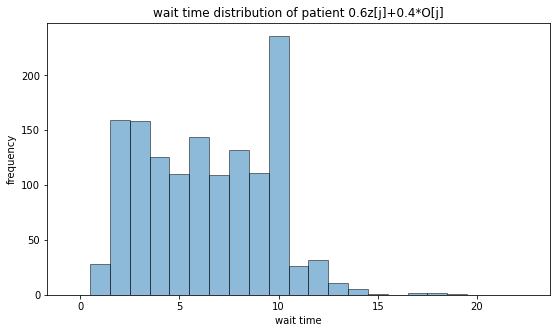

mean:  6.39124192390524
std:  3.1622518928926584
wait time quantiles:
 0.10    2.0
0.50    6.0
0.75    9.0
Name: ModelWaitTime, dtype: float64
number of exceed:  80
urgent:  3.047222222222222
urgent & palliative:  2.5839160839160837
objective value: 205
total computational time: 307.43 s


In [86]:
# min sum of ( 0.6z[j]+0.4*O[j] )
df_preallo2 = pd.read_excel('record_201912_202003_80p_testing_weightedObj.xlsx')
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of patient 0.6z[j]+0.4*O[j]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value: 205')
print('total computational time: 307.43 s')


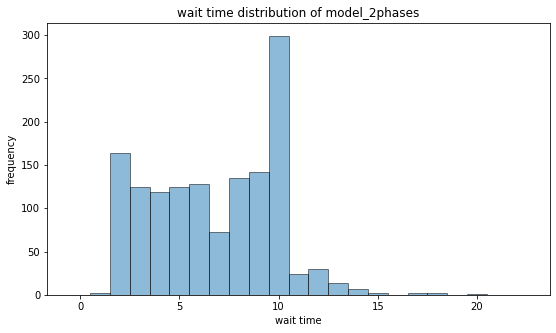

mean:  6.78391959798995
std:  3.162273093831028
wait time quantiles:
 0.10     2.0
0.50     7.0
0.75    10.0
Name: ModelWaitTime, dtype: float64
number of exceed:  82
urgent:  3.186111111111111
urgent & palliative:  2.762237762237762
objective value: 234
total computational time: 561.5 s


In [83]:
# min sum of z[j] first and add new constr
df_preallo2 = pd.read_excel('record_201912_202003_80p_2Phases.xlsx')
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of model_2phases')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value: 234')
print('total computational time: 561.5 s') #2019-11 to 2020-02


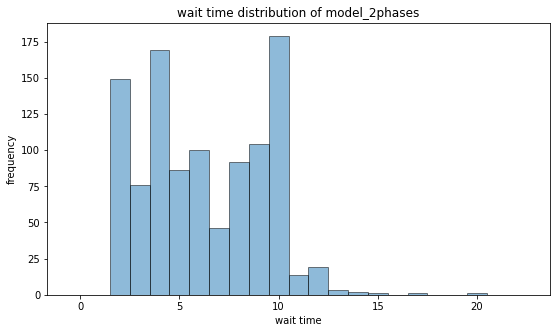

mean:  6.254318618042227
std:  3.0499532391525426
wait time quantiles:
 0.10    2.0
0.50    6.0
0.75    9.0
Name: ModelWaitTime, dtype: float64
number of exceed:  41
urgent:  2.9738805970149254
urgent & palliative:  2.5305164319248825
objective value of sum z: 172
total computational time: 425.5 s


In [94]:
# min sum of z[j] first and add new constr
df_preallo2 = pd.read_excel('record_201912_202003_80p_2Phases_2.xlsx') # 19-12 to 20-02
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of model_2phases')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value of sum z: 172')
print('total computational time: 425.5 s') #2019-11 to 2020-02

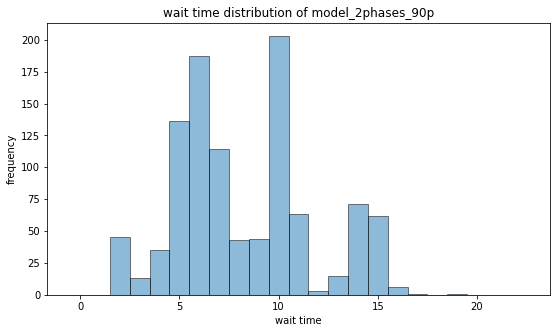

mean:  8.271593090211132
std:  3.47076982597374
wait time quantiles:
 0.10     5.0
0.50     7.0
0.75    10.0
Name: ModelWaitTime, dtype: float64
number of exceed:  222
urgent:  5.164179104477612
urgent & palliative:  4.71830985915493
objective value of sum z: 554
total computational time: 469.1 s


In [90]:
# min sum of z[j] first and add new constr
df_preallo2 = pd.read_excel('record_201912_202003_80p_2Phases_90p.xlsx') # 19-12 to 20-02
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of model_2phases_90p')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value of sum z: 554')
print('total computational time: 469.1 s') #2019-11 to 2020-02

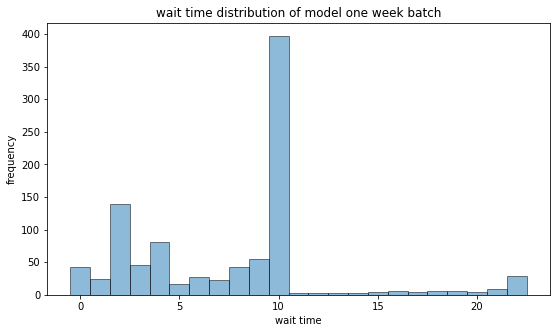

mean:  8.820537428023032
std:  6.4359282492452925
wait time quantiles:
 0.10     2.0
0.50    10.0
0.75    10.0
Name: ModelWaitTime, dtype: float64
number of exceed:  147
urgent:  6.604477611940299
urgent & palliative:  5.71830985915493
objective value of sum z: 163
total computational time: 846 s


In [4]:
# min sum of z[j] first and add new constr
df_preallo2 = pd.read_excel('record_201912_202003_80p_Batching_2phases_longer_time.xlsx') # 19-12 to 20-02
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of model one week batch')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value of sum z: 163')
print('total computational time: 846 s') #2019-11 to 2020-02

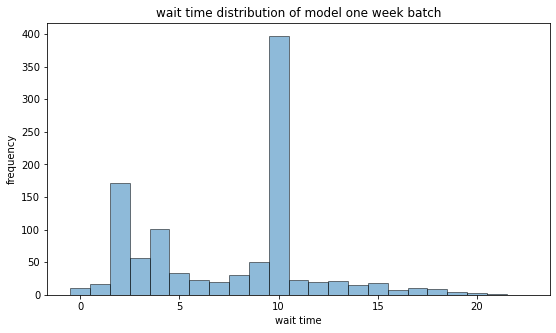

mean:  7.619961612284069
std:  4.24416928375716
wait time quantiles:
 0.10     2.0
0.50    10.0
0.75    10.0
Name: ModelWaitTime, dtype: float64
number of exceed:  133
urgent:  3.0970149253731343
urgent & palliative:  2.6901408450704225
objective value of sum z: 163
total computational time: 846 s


In [97]:
# min sum of z[j] first and add new constr
df_preallo2 = pd.read_excel('record_201912_202003_80p_batching_z_add_O.xlsx') # 19-12 to 20-02
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of model one week batch')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value of sum z: 163')
print('total computational time: 846 s') #2019-11 to 2020-02

In [29]:
#df_hours= pd.read_excel('record_201912_202003_80p_Batching_3d_singleobj.xlsx')
df_hours = pd.read_excel('record_2019_2020_80p_heuristics_MIP_addp.xlsx')
util_cal = df_hours.groupby(['LinacUnit','endDate'])['hours'].agg('sum').reset_index()

util_cal['year'] = df_hours['CreatedDate'].dt.year
util_cal['month'] = df_hours['CreatedDate'].dt.month
util_cal['date']= util_cal['year'].astype(str) + util_cal['month'].astype(str).str.zfill(2)
util_cal['Date'] = pd.to_datetime(util_cal['date'], format='%Y%m')

hours = util_cal.groupby(['LinacUnit'])['hours'].agg('sum').reset_index()
hours['util']=hours['hours']/(20*10*3)
hours['util'].mean()


0.9068650793650794

In [15]:
df_mins = pd.read_excel('util_202003_202006_80p_Batching.xlsx')

df_mins['MonthlyAvg'] = df_mins['totalMinutes']/(3*60)
df_mins['AvgUtil'] = df_mins['MonthlyAvg']/(20*10)
df_mins['AvgUtil'].mean()

0.5858940972222223

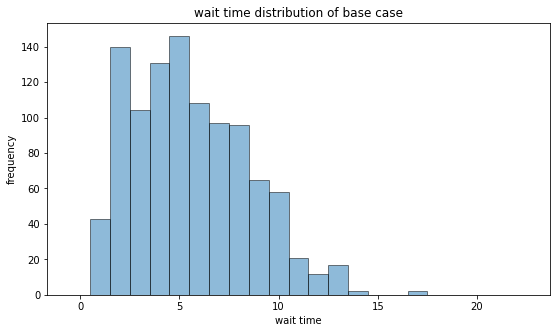

In [448]:
df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [430]:
print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())

mean:  5.575815738963532
std:  2.9233747024515453
wait time quantiles:
 0.10    2.0
0.50    5.0
0.75    8.0
Name: ModelWaitTime, dtype: float64
number of exceed:  54
urgent:  2.675373134328358
urgent & palliative:  2.1455399061032865


In [431]:
df_preallo2['totalHours'] = df_preallo2['TxDuration']*df_preallo2['numFracIn3Months']/60
df_base_linac = df_preallo2.groupby(['CreatedDate','LinacUnit'])['totalHours'].agg('sum').reset_index()
df_base_linac['year'] = df_preallo2['CreatedDate'].dt.year
df_base_linac['month'] = df_preallo2['CreatedDate'].dt.month
df_base_linac['date']= df_base_linac['year'].astype(str) + df_base_linac['month'].astype(str).str.zfill(2)
df_base_linac['Date'] = pd.to_datetime(df_base_linac['date'], format='%Y%m')

util_base = df_base_linac.groupby(['Date','LinacUnit'])['totalHours'].agg('sum').reset_index()
util_base['AvgUtil'] = util_base['totalHours']/(20*10)
util_base.sort_values(by=['LinacUnit'])
util_2m = util_base[(util_base['Date']<'2020-03-01')&(util_base['Date']>'2019-12-01')]
util_2m.groupby(['LinacUnit'])['AvgUtil'].agg('mean')

LinacUnit
1     0.454792
2     0.245000
3     0.492500
4     0.433958
5     0.545417
6     0.528750
7     0.797083
8     0.589792
9     0.372917
10    0.445833
11    1.181458
12    1.072292
15    0.672917
16    0.750208
17    0.807083
Name: AvgUtil, dtype: float64

In [432]:
util_cal = df_preallo2.groupby(['LinacUnit','BookApptDate'])['hours'].agg('sum').reset_index()

util_cal['year'] = df_preallo2['CreatedDate'].dt.year
util_cal['month'] = df_preallo2['CreatedDate'].dt.month
util_cal['date']= util_cal['year'].astype(str) + util_cal['month'].astype(str).str.zfill(2)
util_cal['Date'] = pd.to_datetime(util_cal['date'], format='%Y%m')

hours = util_cal.groupby(['LinacUnit'])['hours'].agg('sum').reset_index()
hours['util']=hours['hours']/(20*10*2)
hours['util'].mean()

0.888013888888889

In [249]:
df_mins = pd.read_excel('util_201912_202002_80p.xlsx')

df_mins['MonthlyAvg'] = df_mins['totalMinutes']/(3*60)
df_mins['AvgUtil'] = df_mins['MonthlyAvg']/(20*10)
df_mins

## 2019-12 to 2020-02 90th percentile

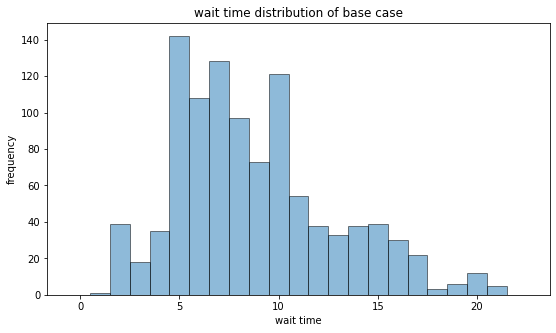

In [411]:
#df_preallo2 = pd.read_excel('record_201902_202002_80p.xlsx')
df_90p = pd.read_excel('record_2021912_202003_90p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_90p['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [412]:
print('mean: ', df_90p['ModelWaitTime'].mean())
print('std: ', df_90p['ModelWaitTime'].std())
print('wait time quantiles:\n', df_90p['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_90p[df_90p['ModelWaitTime']>10]))
print('urgent: ', df_90p[df_90p['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_90p[(df_90p['Category']=='Urgent 2')&
                                    (df_90p['Intent']=='Palliative')]['ModelWaitTime'].mean())

mean:  8.764875239923224
std:  4.01095934224355
wait time quantiles:
 0.10     5.0
0.50     8.0
0.75    11.0
Name: ModelWaitTime, dtype: float64
number of exceed:  280
urgent:  5.130597014925373
urgent & palliative:  4.652582159624413


In [377]:
df_90p['totalHours'] = df_90p['TxDuration']*df_90p['numFracsin3Months']/60
df_base_linac = df_90p.groupby(['CreatedDate','LinacUnit'])['totalHours'].agg('sum').reset_index()
df_base_linac['year'] = df_90p['CreatedDate'].dt.year
df_base_linac['month'] = df_90p['CreatedDate'].dt.month
df_base_linac['date']= df_base_linac['year'].astype(str) + df_base_linac['month'].astype(str).str.zfill(2)
df_base_linac['Date'] = pd.to_datetime(df_base_linac['date'], format='%Y%m')

util_base = df_base_linac.groupby(['Date','LinacUnit'])['totalHours'].agg('sum').reset_index()
util_base['AvgUtil'] = util_base['totalHours']/(20*10)
util_base.sort_values(by=['LinacUnit'])
util_2m = util_base[util_base['Date']<'2020-03-01']
util_2m.groupby(['LinacUnit'])['AvgUtil'].agg('mean')

LinacUnit
1     0.776250
2     0.382500
3     0.683958
4     0.617083
5     0.932917
6     1.012708
7     0.892500
8     1.067083
9     0.248125
10    0.791875
11    1.178333
12    1.281875
15    0.843125
16    1.230208
17    1.271667
Name: AvgUtil, dtype: float64

In [416]:
util_cal = df_90p.groupby(['LinacUnit','BookApptDate'])['hours'].agg('sum').reset_index()

util_cal['year'] = df_90p['CreatedDate'].dt.year
util_cal['month'] = df_90p['CreatedDate'].dt.month
util_cal['date']= util_cal['year'].astype(str) + util_cal['month'].astype(str).str.zfill(2)
util_cal['Date'] = pd.to_datetime(util_cal['date'], format='%Y%m')

In [434]:
hours = util_cal.groupby(['LinacUnit'])['hours'].agg('sum').reset_index()
hours['util']=hours['hours']/(20*10*2)
hours['util'].mean()

0.888013888888889

In [260]:
df_mins = pd.read_excel('util_201912_202002_90p.xlsx')

df_mins['MonthlyAvg'] = df_mins['totalMinutes']/(3*60)
df_mins['AvgUtil'] = df_mins['MonthlyAvg']/(20*10)
df_mins

,Unit,totalMinutes,MonthlyAvg,AvgUtil
0,1,41840,232.444444,1.162222
1,2,10215,56.750000,0.283750
2,3,27670,153.722222,0.768611
3,4,28500,158.333333,0.791667
4,5,27460,152.555556,0.762778
5,6,23015,127.861111,0.639306
6,7,24065,133.694444,0.668472
7,8,27355,151.972222,0.759861
8,9,10900,60.555556,0.302778
9,10,17935,99.638889,0.498194


## 2020-03 to 2020-05 80th percentile

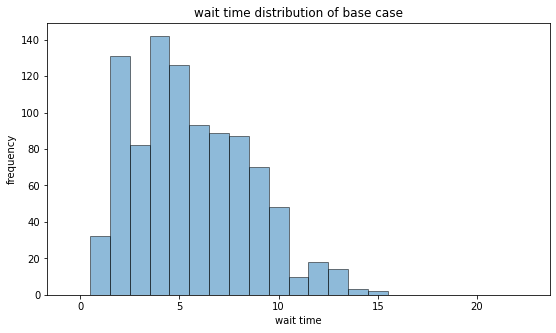

In [435]:
df_preallo2 = pd.read_excel('record_202003_202006_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [436]:
print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())

mean:  5.604012671594509
std:  2.8997529879215187
wait time quantiles:
 0.10    2.0
0.50    5.0
0.75    8.0
Name: ModelWaitTime, dtype: float64
number of exceed:  47
urgent:  2.411764705882353
urgent & palliative:  2.1624365482233503


In [438]:
util_cal = df_preallo2.groupby(['LinacUnit','BookApptDate'])['hours'].agg('sum').reset_index()

util_cal['year'] = df_preallo2['CreatedDate'].dt.year
util_cal['month'] = df_preallo2['CreatedDate'].dt.month
util_cal['date']= util_cal['year'].astype(str) + util_cal['month'].astype(str).str.zfill(2)
util_cal['Date'] = pd.to_datetime(util_cal['date'], format='%Y%m')

In [439]:
hours = util_cal.groupby(['LinacUnit'])['hours'].agg('sum').reset_index()
hours['util']=hours['hours']/(20*10*2)
hours['util'].mean()

0.720625

In [437]:
df_mins = pd.read_excel('util_202003_202006_80p.xlsx')

df_mins['MonthlyAvg'] = df_mins['totalMinutes']/(3*60)
df_mins['AvgUtil'] = df_mins['MonthlyAvg']/(20*10)
df_mins

,Unit,totalMinutes,MonthlyAvg,AvgUtil
0,1,30370,168.722222,0.843611
1,2,4675,25.972222,0.129861
2,3,26480,147.111111,0.735556
3,4,25350,140.833333,0.704167
4,5,13295,73.861111,0.369306
5,6,10390,57.722222,0.288611
6,7,23745,131.916667,0.659583
7,8,24925,138.472222,0.692361
8,9,6545,36.361111,0.181806
9,10,24700,137.222222,0.686111


## 2020-03 to 2020-05 90th percentile

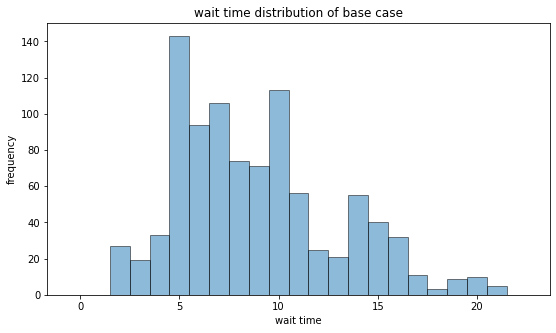

In [440]:
df_preallo2 = pd.read_excel('record_202003_202006_90p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of base case')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [441]:
df_preallo2.shape

(947, 15)

In [442]:
print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())

mean:  8.883843717001056
std:  4.049015594203573
wait time quantiles:
 0.10     5.0
0.50     8.0
0.75    11.0
Name: ModelWaitTime, dtype: float64
number of exceed:  267
urgent:  4.950226244343892
urgent & palliative:  4.715736040609137


In [443]:
util_cal = df_preallo2.groupby(['LinacUnit','BookApptDate'])['hours'].agg('sum').reset_index()

util_cal['year'] = df_preallo2['CreatedDate'].dt.year
util_cal['month'] = df_preallo2['CreatedDate'].dt.month
util_cal['date']= util_cal['year'].astype(str) + util_cal['month'].astype(str).str.zfill(2)
util_cal['Date'] = pd.to_datetime(util_cal['date'], format='%Y%m')

In [444]:
hours = util_cal.groupby(['LinacUnit'])['hours'].agg('sum').reset_index()
hours['util']=hours['hours']/(20*10*2)
hours['util'].mean()

0.6709444444444445

In [266]:
df_mins = pd.read_excel('util_202003_202006_90p.xlsx')

df_mins['MonthlyAvg'] = df_mins['totalMinutes']/(3*60)
df_mins['AvgUtil'] = df_mins['MonthlyAvg']/(20*10)
df_mins

,Unit,totalMinutes,MonthlyAvg,AvgUtil
0,1,26230,145.722222,0.728611
1,2,2955,16.416667,0.082083
2,3,21845,121.361111,0.606806
3,4,31980,177.666667,0.888333
4,5,14225,79.027778,0.395139
5,6,14280,79.333333,0.396667
6,7,26820,149.000000,0.745000
7,8,23620,131.222222,0.656111
8,9,3785,21.027778,0.105139
9,10,29060,161.444444,0.807222


range(1, 6)

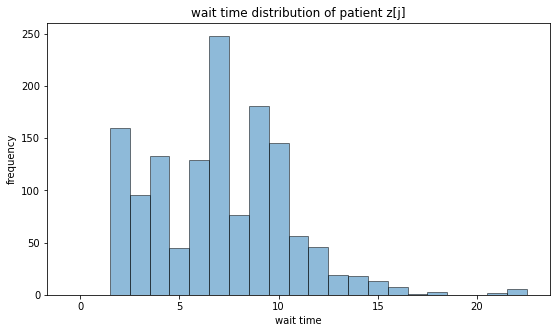

mean:  7.189519023689878
std:  3.74817647020907
wait time quantiles:
 0.10    2.0
0.50    7.0
0.75    9.0
Name: ModelWaitTime, dtype: float64
number of exceed:  180
urgent:  3.786111111111111
urgent & palliative:  3.304195804195804
objective value: 193
total computational time: 300.99 s


In [3]:
# heuristic model
df_preallo2 = pd.read_excel('record_2019_2020_80p_heuristics_corrected.xlsx')
#df_preallo2 = df_preallo2[df_preallo2['CreatedDate']>='2019-12-01']
#df_preallo2 = pd.read_excel('record_2021912_202003_80p_util.xlsx')
plt.figure(figsize=[9,5])
bins = range(0,24)

y = df_preallo2['ModelWaitTime']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('wait time')
plt.ylabel('frequency')
plt.title('wait time distribution of patient z[j]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

print('mean: ', df_preallo2['ModelWaitTime'].mean())
print('std: ', df_preallo2['ModelWaitTime'].std())
print('wait time quantiles:\n', df_preallo2['ModelWaitTime'].quantile([.1, .5, .75]))
print('number of exceed: ', len(df_preallo2[df_preallo2['ModelWaitTime']>10]))
print('urgent: ', df_preallo2[df_preallo2['Category']=='Urgent 2']['ModelWaitTime'].mean())
print('urgent & palliative: ', df_preallo2[(df_preallo2['Category']=='Urgent 2')&
                                           (df_preallo2['Intent']=='Palliative')]['ModelWaitTime'].mean())
print('objective value: 193')
print('total computational time: 300.99 s')